# Lab Assignment One: Exploring Table or Text Data

Group

Renjie(Sebastian) Lu

Liwei Li (47708015)

# 1. Business Understanding

# Introduction to the Car Sales dataset 
Craigslist is the one of the world's largest collection of used vehicles for sale, yet it's very difficult to collect all of them in the same place. Craigslist collects the used vehicles all over the world including Asia and Africa. It's hard to put all those used vehicles data together because huge data amount and some regional restriction such as currency float and privacy policy. This data only collected the used vehicles information in the United States where Craigslist shares the biggest market over the world. This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 16 other categories.

# The purpose of the dataset 
Again, those used vehicles information was collected from Craigslist. They have all relevant information about the used cars they gave for sales including sales price. The Craigslist get those used cars information once they buy the car from previous owner or car reports or they just check the vin number of that used car they will have all the relevant information about that car. Since they have collected the information about the used car they bought, they will store that information into their database and put it online with the price for customers. Customer can access the information from anywhere instead of going to the retail store for price and information they need. Another reason they store those information besides for sales would be management level. Craigslist share the large proportion of the used cars market, managing those assets (aka used cars) effectively is also what they need to concern. With those used car information they stored, they can easily check those inventory. 

# Prediction task for your data
Through processing the data, we really want to know what are the key factors influence the sales price of the used cars on Craigslist. We would like also explore the behavior of the regional sales of the used cars. 

# Who else interested in the result?
We would say both vehicle dealers and consumers may interest in the result. For dealers, they could know what are the key factors of the sales price, how was the local sales differ than other states. They could adjust their business strategy. For consumers, they can explore how was the used cars market distribute like which manufacturer has lowest price in the market and how the price was different from states to states.  It is also good for those who want to sell their cars that what are the factors may influence their car’s value and what is the best price to sell. 

# How well would your prediction algorithm need to perform to be considered useful to these third parties?

# 2. Data understanding

In [3]:
#attribute pandas & numpy to csv.
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

#import raw data, named as 'cars'
cars = pd.read_csv('https://raw.githubusercontent.com/sebastian0303/CS7324/master/CS%207324%20LAB%20ONE%20.csv')

#TEST READING
cars.head()

Pandas: 0.25.1
Numpy: 1.16.4


,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,size,type,paint_color,lat,long,county_fips,county_name,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,NaN,coupe,red,43.4775,-96.7041,46083.0,Lincoln,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,NaN,NaN,44.1415,-103.2052,46093.0,Meade,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,full-size,sedan,grey,43.2845,-95.5930,19143.0,Osceola,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,IA,Iowa,47.0


In [4]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119784 entries, 0 to 119783
Data columns (total 24 columns):
url             119784 non-null object
city            119784 non-null object
price           119784 non-null int64
year            119227 non-null float64
manufacturer    109597 non-null object
make            114653 non-null object
condition       71411 non-null object
cylinders       67705 non-null object
fuel            118829 non-null object
odometer        78193 non-null float64
title_status    119245 non-null object
transmission    118854 non-null object
vin             38329 non-null object
drive           70971 non-null object
size            39691 non-null object
type            67592 non-null object
paint_color     67150 non-null object
lat             119784 non-null float64
long            119784 non-null float64
county_fips     99688 non-null float64
county_name     99688 non-null object
state_code      99688 non-null object
state_name      119784 non-null object

In [5]:
# capitalize columns name to avoid colliding reserved keywords
cars.columns = map(str.capitalize, cars.columns)
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119784 entries, 0 to 119783
Data columns (total 24 columns):
Url             119784 non-null object
City            119784 non-null object
Price           119784 non-null int64
Year            119227 non-null float64
Manufacturer    109597 non-null object
Make            114653 non-null object
Condition       71411 non-null object
Cylinders       67705 non-null object
Fuel            118829 non-null object
Odometer        78193 non-null float64
Title_status    119245 non-null object
Transmission    118854 non-null object
Vin             38329 non-null object
Drive           70971 non-null object
Size            39691 non-null object
Type            67592 non-null object
Paint_color     67150 non-null object
Lat             119784 non-null float64
Long            119784 non-null float64
County_fips     99688 non-null float64
County_name     99688 non-null object
State_code      99688 non-null object
State_name      119784 non-null object

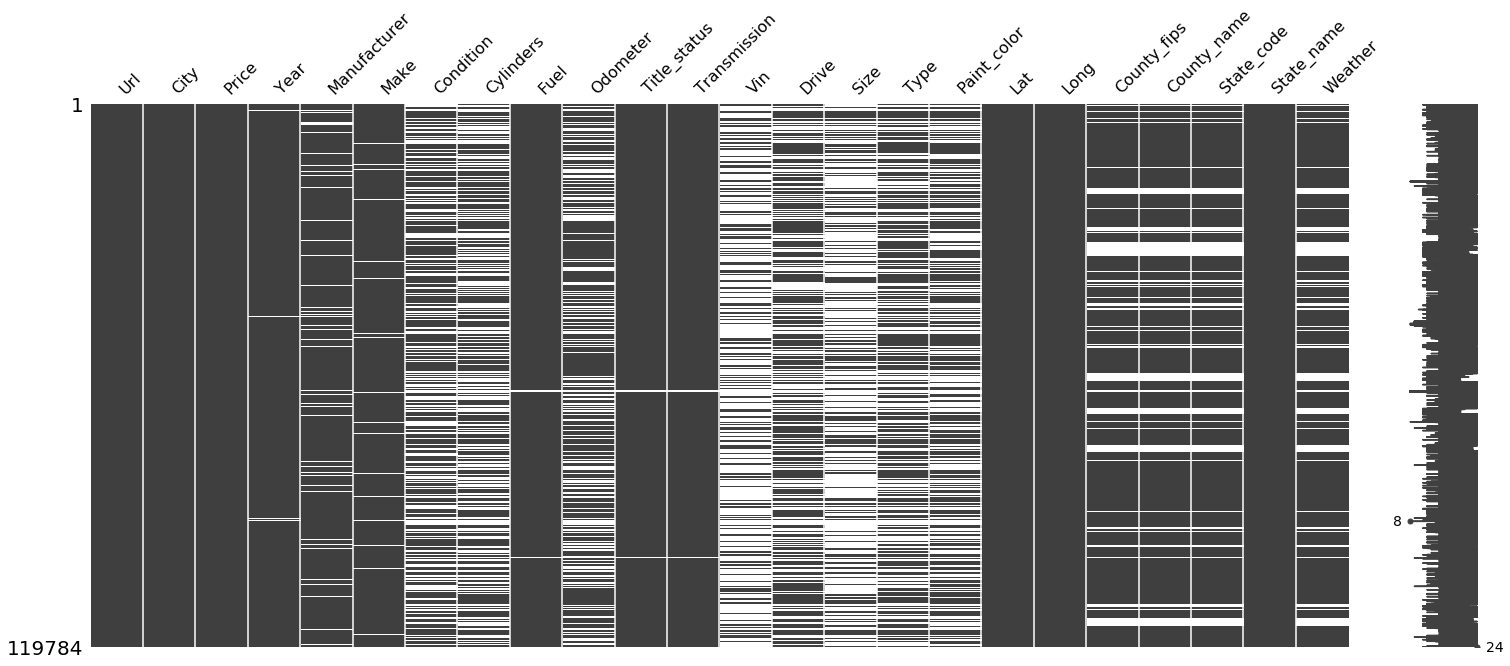

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(cars)

In [7]:
# clean the dataset

for col in ['Url','Vin', 'Lat', 'Long', 'County_fips', 'County_name', 'State_code',  'City', 'Weather', 'Make']:
    if col in cars:
        del cars[col]

cars_imputing = cars.dropna(subset=['Year','Type','Condition','Manufacturer','Cylinders','Drive','Paint_color','Size'])

print(cars_imputing.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28737 entries, 3 to 119782
Data columns (total 14 columns):
Price           28737 non-null int64
Year            28737 non-null float64
Manufacturer    28737 non-null object
Condition       28737 non-null object
Cylinders       28737 non-null object
Fuel            28737 non-null object
Odometer        23838 non-null float64
Title_status    28737 non-null object
Transmission    28733 non-null object
Drive           28737 non-null object
Size            28737 non-null object
Type            28737 non-null object
Paint_color     28737 non-null object
State_name      28737 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 3.3+ MB
None


In [8]:
# checking the duplicate entities
repr(set(cars_imputing['Size']))

"{'sub-compact', 'mid-size', 'compact', 'full-size'}"

In [9]:
# group attributes relevant to odometer
cars_grouped = cars_imputing.groupby(by=['Year','Condition','Type'])

cars_imputed = cars_grouped.transform(lambda grp: grp.fillna(grp.median()))

col_deleted = list( set(cars_imputing.columns) - set(cars_imputed.columns))
cars_imputed[col_deleted] = cars_imputing[col_deleted]

print(cars_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28737 entries, 3 to 119782
Data columns (total 14 columns):
Price           28737 non-null int64
Odometer        28190 non-null float64
Drive           28737 non-null object
Manufacturer    28737 non-null object
Title_status    28737 non-null object
Transmission    28733 non-null object
Paint_color     28737 non-null object
Fuel            28737 non-null object
Size            28737 non-null object
State_name      28737 non-null object
Year            28737 non-null float64
Condition       28737 non-null object
Cylinders       28737 non-null object
Type            28737 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 3.3+ MB
None


In [10]:
cars_imputed.dropna(inplace=True)

print(cars_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28186 entries, 3 to 119782
Data columns (total 14 columns):
Price           28186 non-null int64
Odometer        28186 non-null float64
Drive           28186 non-null object
Manufacturer    28186 non-null object
Title_status    28186 non-null object
Transmission    28186 non-null object
Paint_color     28186 non-null object
Fuel            28186 non-null object
Size            28186 non-null object
State_name      28186 non-null object
Year            28186 non-null float64
Condition       28186 non-null object
Cylinders       28186 non-null object
Type            28186 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 3.2+ MB
None


In [11]:
# convert year to integer
cars_imputed = cars_imputed.astype({'Year': 'int64'})
# quantify cylinders
cars_imputed.Cylinders.replace(to_replace=['6 cylinders','5 cylinders','4 cylinders','other','10 cylinders','12 cylinders','3 cylinders','8 cylinders'],
                               value=[6,5,4,0,10,12,3,8],
                               inplace=True)

cars_imputed.Condition.replace(to_replace=['salvage', 'fair', 'good', 'excellent', 'like new', 'new'],
                               value=[1,2,3,4,5,6],
                               inplace=True)

cars_imputed.Size.replace(to_replace=['sub-compact', 'compact', 'mid-size', 'full-size'],
                               value=[1,2,3,4],
                               inplace=True)

cars_imputed.Title_status.replace(to_replace=['rebuilt', 'salvage', 'lien', 'parts only', 'missing'],
                               value='not clean',
                               inplace=True)


# 如果一个值小于QL01.5IQR或大于OU-1.5IQR的值，则被称为异常值
Q1 = cars_imputed.quantile(0.25)
Q3 = cars_imputed.quantile(0.75)
IQR = Q3 - Q1

cars_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28186 entries, 3 to 119782
Data columns (total 14 columns):
Price           28186 non-null int64
Odometer        28186 non-null float64
Drive           28186 non-null object
Manufacturer    28186 non-null object
Title_status    28186 non-null object
Transmission    28186 non-null object
Paint_color     28186 non-null object
Fuel            28186 non-null object
Size            28186 non-null int64
State_name      28186 non-null object
Year            28186 non-null int64
Condition       28186 non-null int64
Cylinders       28186 non-null int64
Type            28186 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 3.2+ MB


In [12]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

print('Matplotlib:', matplotlib. __version__)

Matplotlib: 3.1.1


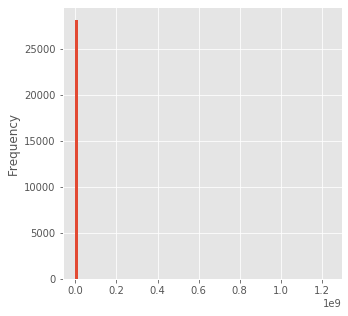

In [13]:
plt.style.use('ggplot')

# checking the price distribution
fig = plt.figure(figsize=(5,5))
cars_imputed.Price.plot.hist(bins=100)

plt.show()

Price         16000.0
Odometer     160576.0
Size              4.0
Year           2012.0
Condition         4.0
Cylinders         8.0
Name: 0.75, dtype: float64
Price         3800.0
Odometer     67279.0
Size             3.0
Year          2003.0
Condition        3.0
Cylinders        4.0
Name: 0.25, dtype: float64
count    2.818600e+04
mean     1.311191e+05
std      1.116662e+07
min      1.000000e+00
25%      3.800000e+03
50%      7.990000e+03
75%      1.600000e+04
max      1.234568e+09
Name: Price, dtype: float64


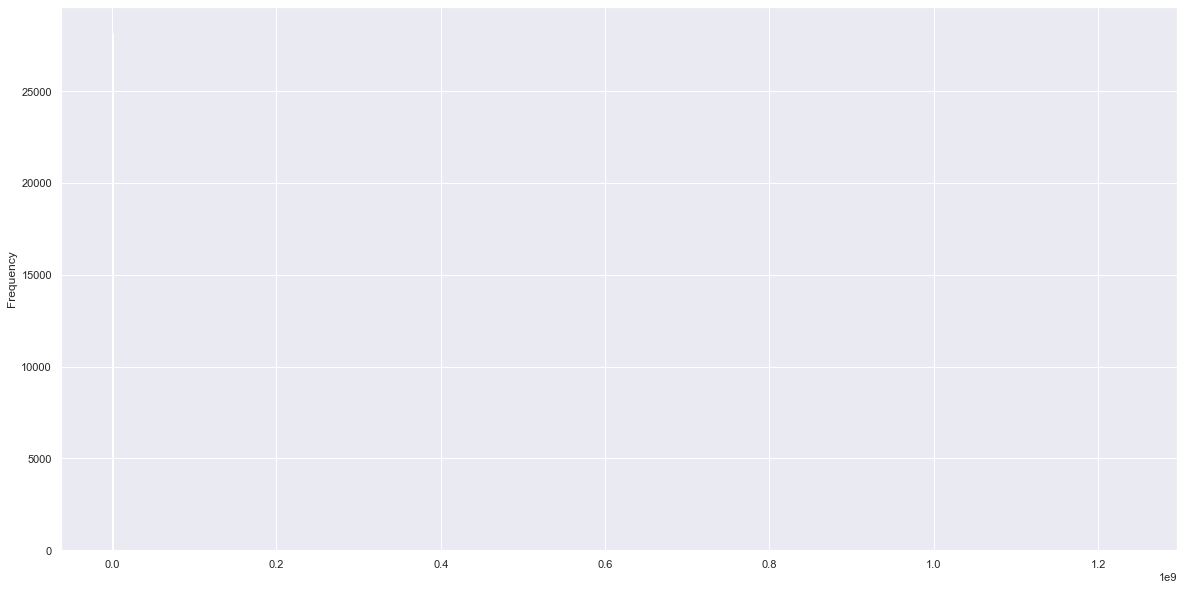

In [28]:
# what a disaster!
# impute noise of price
# cars_imputed = cars_imputed[cars_imputed.Price<100000]
# cars_imputed = cars_imputed[cars_imputed.Price>100]

Q1 = cars_imputed.quantile(0.25)
Q3 = cars_imputed.quantile(0.75)
IQR = Q3 - Q1
# cars_imputed = cars_imputed[~((cars_imputed < (Q1-1.5*IQR )))]
print(Q3)
print(Q1)
print(cars_imputed.Price.describe())
cars_imputed.Price.plot.hist(bins=1000, figsize=(20,10))

plt.show()

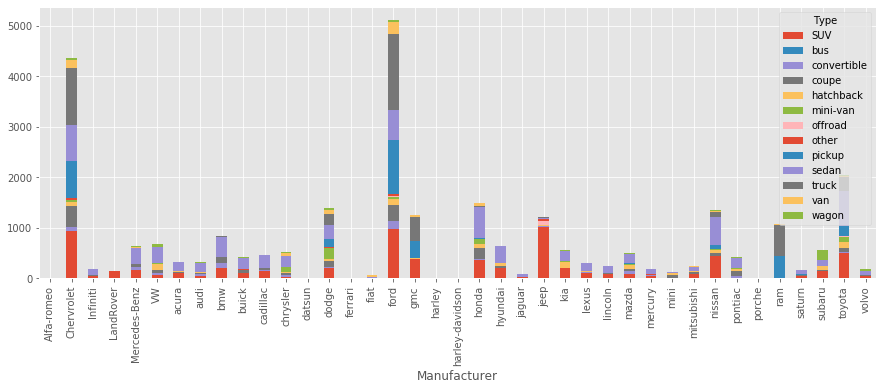

In [15]:
categories = pd.crosstab(cars_imputed.Manufacturer,cars_imputed.Type)

categories.plot(kind='bar', stacked=True, figsize=(15,5))
plt.show()

In [16]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

print('Seaborn:', sns. __version__)

Seaborn: 0.9.0


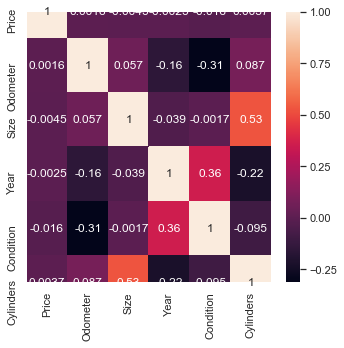

In [17]:
cmap = sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cars_imputed.corr(), cmap=cmap, annot=True)

f.tight_layout()

1. Condition and year correlate to price closly what makes sense to us, but the correlation of odometer and price is far out of expectation.  We need to work more to figure out why is that in this dataset.

2. I realize the number of engine cylinders is given based on the size, which should correlate to the weight of the car.

3. Year is irrelevent to odeometer also suprised us.

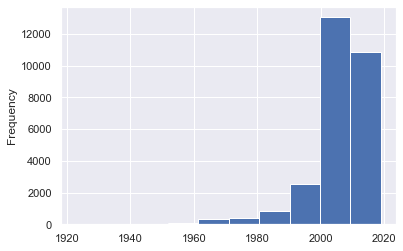

In [18]:
# sns.violinplot(x="Year", y="Odometer", data=cars_imputed)
cars_imputed.Year.plot.hist()

plt.show()

In [19]:
# break up year variable
# historical cars are not for commuting, we try to split it as a single analyzing category
cars_imputed['Year_range'] = pd.cut(cars_imputed['Year'],[1920, 1970, 2019],
                                   labels=['Historical', 'Used'])

cars_imputed.Year_range.describe()

count     28186
unique        2
top        Used
freq      27626
Name: Year_range, dtype: object

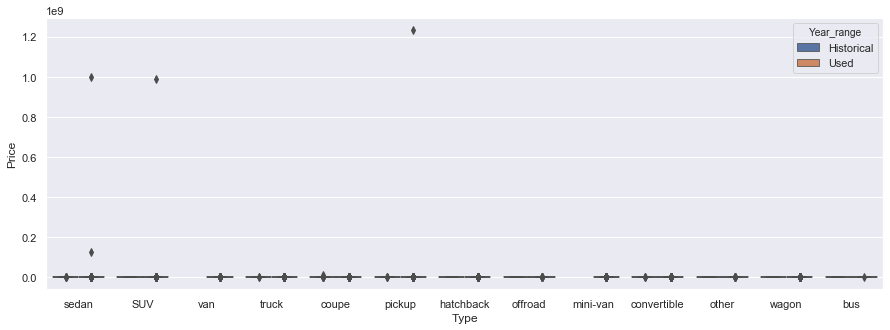

In [31]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Type", y="Price", hue="Year_range", data=cars_imputed)
    
plt.show()